<a href="https://colab.research.google.com/github/RubateBeta/Superstore_sales_report_task8/blob/main/Hate%20speech%20and%20offensive%20language%20classification%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install -U scikit-learn imbalanced-learn

In [16]:
df = pd.read_csv('hate speech.csv')
df.head(5)

,Column1,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
df.shape

(24783, 7)

In [6]:
df.describe()

,Column1,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [7]:
df.isnull().sum()

,0
Column1,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [8]:
df.duplicated().sum()

np.int64(0)

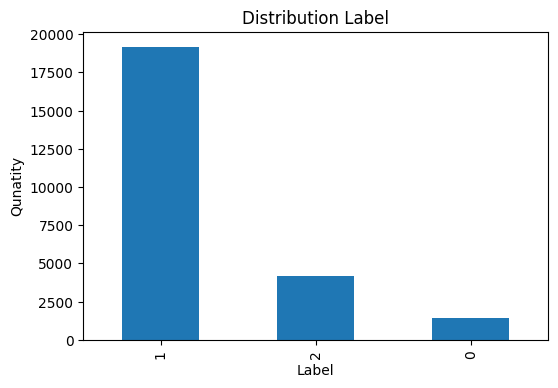

In [18]:
label_counts = df['class'].value_counts()

plt.figure(figsize=(6, 4))
label_counts.plot(kind="bar")
plt.title("Distribution Label")
plt.xlabel("Label")
plt.ylabel("Qunatity")
plt.show()

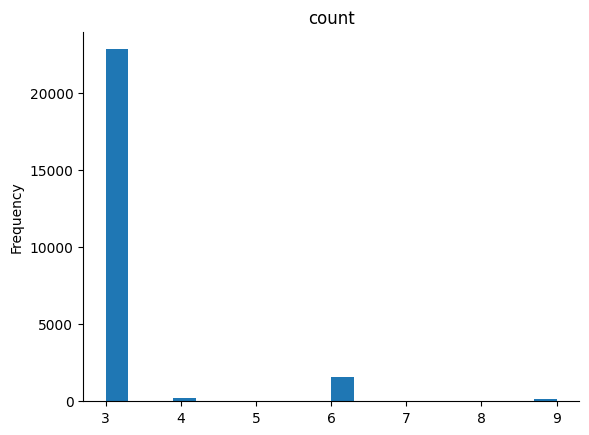

In [11]:
# @title count

from matplotlib import pyplot as plt
df['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

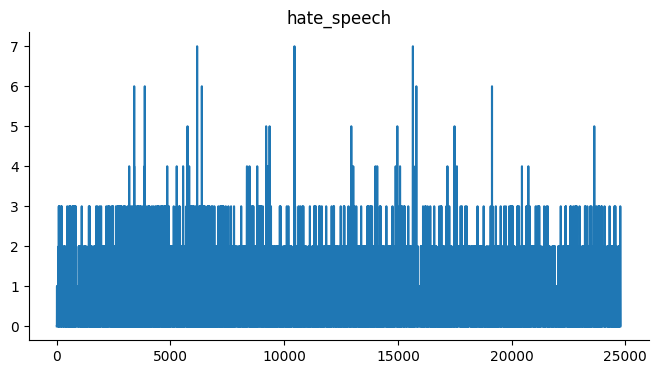

In [14]:
# @title hate_speech

from matplotlib import pyplot as plt
df['hate_speech'].plot(kind='line', figsize=(8, 4), title='hate_speech')
plt.gca().spines[['top', 'right']].set_visible(False)

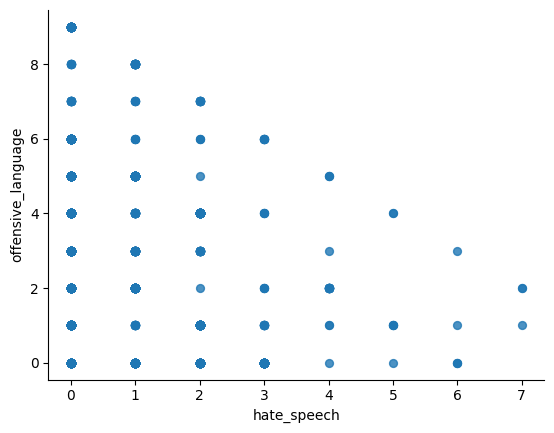

In [13]:
# @title hate_speech vs offensive_language

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='hate_speech', y='offensive_language', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

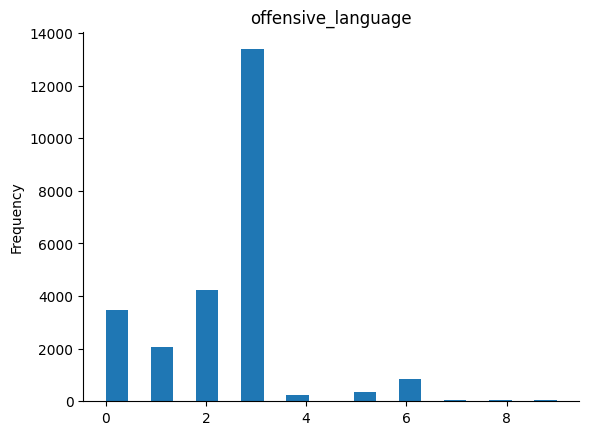

In [12]:
# @title offensive_language

from matplotlib import pyplot as plt
df['offensive_language'].plot(kind='hist', bins=20, title='offensive_language')
plt.gca().spines[['top', 'right',]].set_visible(False)

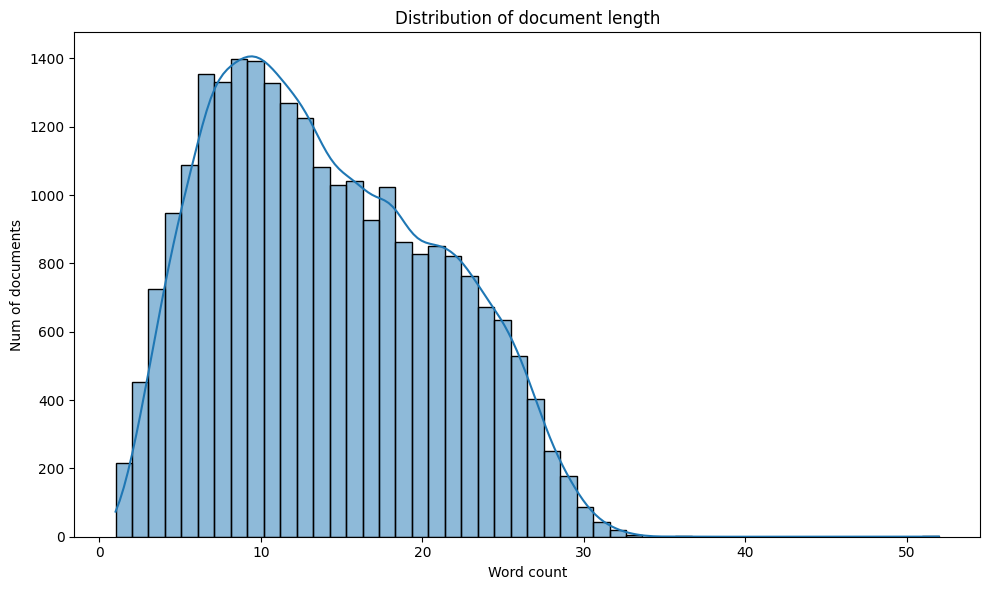

In [17]:
df['length'] = df['tweet'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=50, kde=True)
plt.title("Distribution of document length")
plt.xlabel("Word count")
plt.ylabel("Num of documents")
plt.tight_layout()
plt.show()

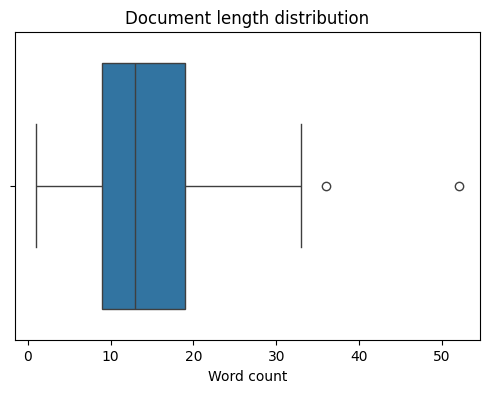

In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['length'])
plt.title("Document length distribution")
plt.xlabel("Word count")
plt.show()

# To equalize the number of data points in each class

In [22]:
df ['class']. value_counts()

,count
class,
1,19190
2,4163
0,1430


In [23]:
data_by_label = df.groupby('class')

# take 1430 data points per target class
balanced_data = data_by_label.apply(lambda x: x.sample(n=1430, random_state=14))
balanced_data = balanced_data.reset_index(drop=True)
balanced_data['class'].value_counts()

<ipython-input-23-b2e1549ea674>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_data = data_by_label.apply(lambda x: x.sample(n=1430, random_state=14))


,count
class,
0,1430
1,1430
2,1430


In [25]:
df = balanced_data
df['tweet'].head(5)

,tweet
0,"Peace fags, just remember I'm best Lux support..."
1,I would like to apologize to anyone I have cal...
2,@lord_jonesss none of my business ? Nigga if y...
3,RT @Unorthodex: Nah I hate white people now si...
4,@krispy717 @grizzboadams fucking gay faggot lo...


In [28]:
# re module provides regular expression
import re

df['tweet'].replace(r'@\w+', '', regex=True, inplace=True)
df['tweet'].head(5)

<ipython-input-28-9b5941ca24c0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tweet'].replace(r'@\w+', '', regex=True, inplace=True)


,tweet
0,"Peace fags, just remember I'm best Lux support..."
1,I would like to apologize to anyone I have cal...
2,none of my business ? Nigga if you get that I...
3,RT : Nah I hate white people now since he look...
4,fucking gay faggot look at that gay ass pink...


In [29]:
df['tweet'].replace(r'RT : ', '', regex=True, inplace=True)
df['tweet'].head(5)

<ipython-input-29-9efa6294df00>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tweet'].replace(r'RT : ', '', regex=True, inplace=True)


,tweet
0,"Peace fags, just remember I'm best Lux support..."
1,I would like to apologize to anyone I have cal...
2,none of my business ? Nigga if you get that I...
3,Nah I hate white people now since he looks lik...
4,fucking gay faggot look at that gay ass pink...


In [30]:
df['tweet'].replace(r'http\S+', '', regex=True, inplace=True)
df['tweet'].head(5)

<ipython-input-30-a4781e546eee>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tweet'].replace(r'http\S+', '', regex=True, inplace=True)


,tweet
0,"Peace fags, just remember I'm best Lux support..."
1,I would like to apologize to anyone I have cal...
2,none of my business ? Nigga if you get that I...
3,Nah I hate white people now since he looks lik...
4,fucking gay faggot look at that gay ass pink...


In [31]:
df['tweet'].replace(r'(\n)+', ' ', regex=True, inplace=True)
df['tweet'].head(2)

<ipython-input-31-205866a31109>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tweet'].replace(r'(\n)+', ' ', regex=True, inplace=True)


,tweet
0,"Peace fags, just remember I'm best Lux support..."
1,I would like to apologize to anyone I have cal...


In [32]:
df['tweet'].replace(r'&#\d+;', ' ', regex=True, inplace=True)
df['tweet'].head(2)

<ipython-input-32-b59c8c88fd58>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tweet'].replace(r'&#\d+;', ' ', regex=True, inplace=True)


,tweet
0,"Peace fags, just remember I'm best Lux support..."
1,I would like to apologize to anyone I have cal...


In [33]:
df['tweet'].replace(r' +', ' ', regex=True, inplace=True)
df['tweet'].head(2)

<ipython-input-33-98dbbae0005d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tweet'].replace(r' +', ' ', regex=True, inplace=True)


,tweet
0,"Peace fags, just remember I'm best Lux support..."
1,I would like to apologize to anyone I have cal...


In [34]:
df['tweet'].replace(r'#(\w+)', '', regex=True, inplace=True)
df['tweet'].head(2)

<ipython-input-34-2505f7a07712>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tweet'].replace(r'#(\w+)', '', regex=True, inplace=True)


,tweet
0,"Peace fags, just remember I'm best Lux support..."
1,I would like to apologize to anyone I have cal...


In [36]:
# Removin panctuation
df['tweet'].replace(r'[^\w\s\d]+', '', regex=True, inplace=True)
df['tweet'].head(2)

<ipython-input-36-70539da9b06c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tweet'].replace(r'[^\w\s\d]+', '', regex=True, inplace=True)


,tweet
0,Peace fags just remember Im best Lux support N...
1,I would like to apologize to anyone I have cal...


# Stopwords Removal

In [47]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
def remove_stopwords(text: str) -> str:
  return " ".join([word for word in str(text).split(" ") if word not in stopwords])

df['tweet'] = df['tweet'].apply(remove_stopwords)
df['tweet'].head(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet
0,Peace fag remember Im best Lux support NA Drop...
1,I would like apologize anyone I called fat stu...


Text(0, 0.5, 'Num of documents')

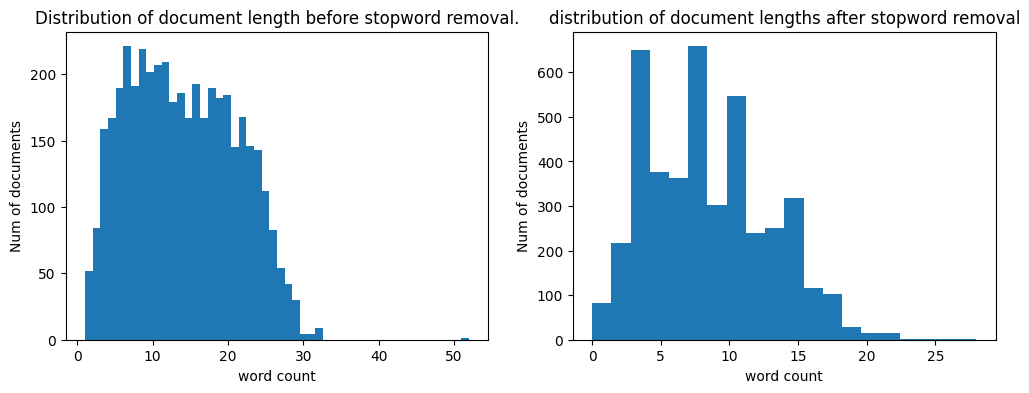

In [48]:
df['stopword_removed_length'] = df['tweet'].apply(lambda x: len(str(x).split()))

fig, axis = plt.subplots(1, 2, figsize=(12, 4))

# distribusi panjang dokumen sebelum stopword removal
axis[0].hist(df['length'], bins=50)
axis[0].set_title('Distribution of document length before stopword removal.')
axis[0].set_xlabel('word count')
axis[0].set_ylabel('Num of documents')

# distribusi panjang dokumen setelah stopword removal
axis[1].hist(df['stopword_removed_length'], bins=20)
axis[1].set_title('distribution of document lengths after stopword removal')
axis[1].set_xlabel('word count')
axis[1].set_ylabel('Num of documents')

# Lemmatization

In [49]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize(test: str) -> str:
  return " ".join([lemmatizer.lemmatize(word) for word in test.split(" ")])

df['tweet_before_lemmatization'] = df['tweet']
df['tweet'] = df['tweet'].apply(lemmatize)
df['tweet'].head(2)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,tweet
0,Peace fag remember Im best Lux support NA Drop...
1,I would like apologize anyone I called fat stu...


# Check Null after Preprocessing

In [50]:
df['stopword_removed_length'].value_counts()

,count
stopword_removed_length,
5,376
4,369
6,362
8,332
7,326
9,302
10,295
3,281
11,252


In [51]:
df = df[df['stopword_removed_length'] > 0]
df['stopword_removed_length'].value_counts()

,count
stopword_removed_length,
5,376
4,369
6,362
8,332
7,326
9,302
10,295
3,281
11,252


In [52]:
df['class'].value_counts()

,count
class,
1,1430
2,1429
0,1425


In [53]:
df.drop(columns=[
    'stopword_removed_length',
    'tweet_before_lemmatization',
    'count',
    'hate_speech',
    'offensive_language',
    'neither'
    ],
    inplace=True
)
df.head()

<ipython-input-53-7ae88a9d0ebd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[


,Column1,class,tweet,length
0,14112,0,Peace fag remember Im best Lux support NA Drop...,17
1,11416,0,I would like apologize anyone I called fat stu...,25
2,6782,0,none business Nigga get Im living lol Im ste...,26
3,18345,0,Nah I hate white people since look like dyke I...,23
4,6711,0,fucking gay faggot look gay pink shirt haha,13


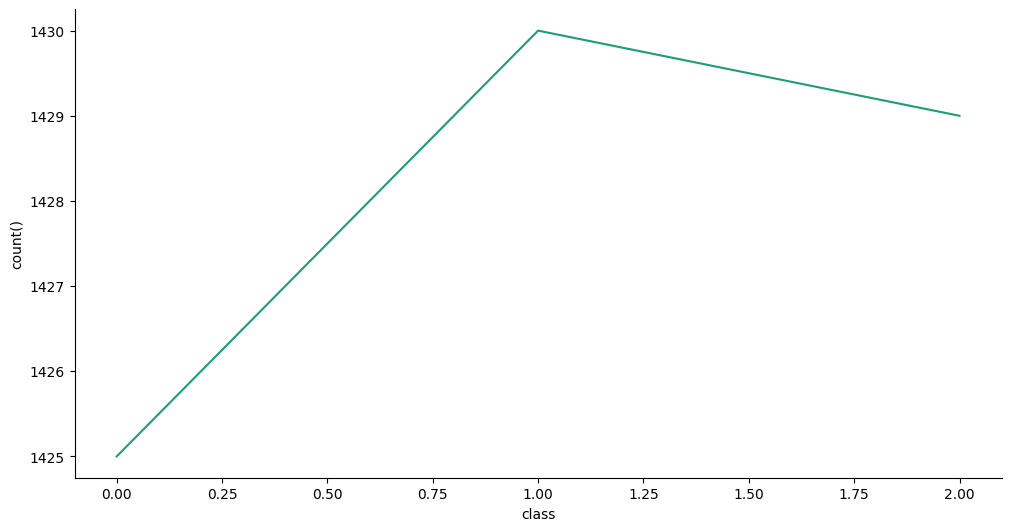

In [55]:
# @title class vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['class']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'class'}, axis=1)
              .sort_values('class', ascending=True))
  xs = counted['class']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('class')
_ = plt.ylabel('count()')

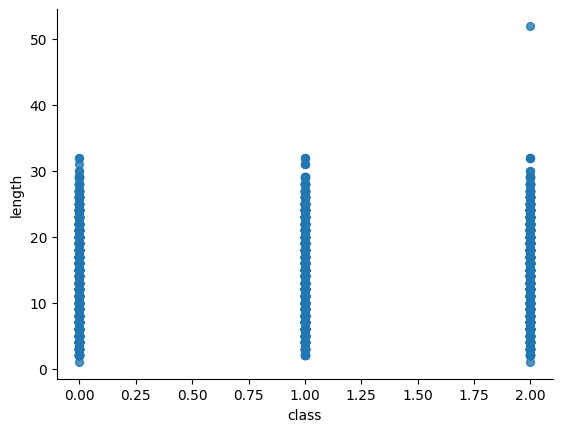

In [54]:
# @title class vs length

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='class', y='length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)



Here is a summary of the analysis and the outcomes/works of the project based on the provided code:

**Outcomes and Works:**

*   **Data Loading and Initial Inspection:**
    *   Loaded the 'hate speech.csv' dataset into a pandas DataFrame.
    *   Performed basic data inspection: viewing the head, checking shape, descriptive statistics, and identifying null values and duplicates.
*   **Exploratory Data Analysis (EDA):**
    *   Visualized the distribution of the 'class' column using a bar plot, revealing class imbalance in the original dataset.
    *   Visualized the distribution of the 'count' column using a histogram.
    *   Visualized the relationship between 'hate\_speech' and 'offensive\_language' using a scatter plot.
    *   Visualized the distribution of 'offensive\_language' using a histogram.
    *   Calculated the word count (length) for each tweet and visualized its distribution using a histogram and a box plot.
*   **Data Balancing:**
    *   Addressed the class imbalance issue by undersampling the majority classes to match the size of the minority class (1430 samples per class). This resulted in a balanced dataset for further analysis.
*   **Text Preprocessing:**
    *   Applied a series of regular expression operations to clean the tweet text, including removing mentions (@), RT prefixes, URLs, newline characters, HTML entities, extra spaces, and hashtags.
    *   Removed punctuation from the tweets.
    *   Removed common English stopwords using NLTK.
    *   Visualized the distribution of document lengths before and after stopword removal, demonstrating the effect of this step.
    *   Applied lemmatization using NLTK to reduce words to their base form.
*   **Post-Preprocessing Checks and Data Cleaning:**
    *   Checked for tweets with zero length after stopword removal and removed them.
    *   Verified the class distribution after balancing and removing zero-length tweets.
    *   Dropped irrelevant columns ('stopword\_removed\_length', 'tweet\_before\_lemmatization', 'count', 'hate\_speech', 'offensive\_language', 'neither') to prepare the data for subsequent tasks (likely model training, which is not included in this code).
*   **Post-Preprocessing Visualization:**
    *   Visualized the count of each class in the balanced and cleaned dataset using a line plot.
#    *   Visualized the relationship between the 'class' and 'length' of the tweets using a scatter plot.

# **Thanks **
